# Analog Vs Digital Transmission

In this notebook we will explore the potential advantages of digital transmission over analog transmission. We will consider the case of transmission over a long (e.g. transoceanic) cable in which several repeaters are used to compensate for the attenuation introduced by the transmission.

Remember that if each cable segment introduces an attenuation of 1/G , we can recover the original amplitude by boosting the signal with a repeater with gain  GG . However, if the signal has accumulated additive noise, the noise will be amplified as well so that, after  N  repeaters, the noise will have been amplified  N  times:

x̂(t)=x(t)+NGσ(t)
 
If we use a digital signal, on the other hand, we can threshold the signal after each repeater and virtually eliminate the noise at each stage, so that even after several repeaters the trasmission is still noise-free.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

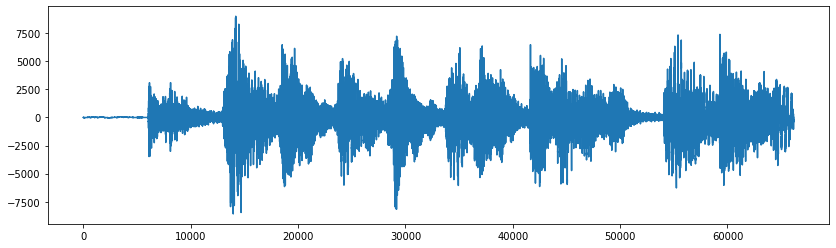

In [3]:
rate,s= wavfile.read('CantinaBand3.wav')
plt.plot(s);
IPython.display.Audio(s, rate=rate)

We will now create two version of the audio signal, an "analog" version and a "digital" version. Obviously the analog version is just a simulation, since we're using a digital computer; we will assume that, by using floating point values, we're in fact close enough to infinite precision. In the digital version of the signal, on the other hand, the audio samples will only take integer values between -100 and +100 (i.e. we will use approximately 8 bits per audio sample).

In [4]:
# the analog signal is simply rescaled between -100 and +100
# largest element in magnitude:
norm = 1.0 / max(np.absolute([min(s), max(s)]))
sA = 100.0 * s * norm

# the digital version is clamped to the integers
sD = np.round(sA)

Now plot the error

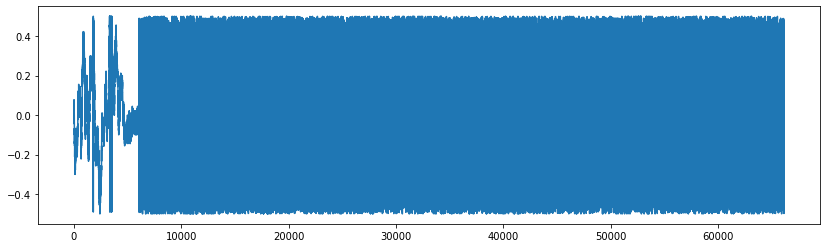

In [5]:
plt.plot(sA-sD);

The error is between -0.5 and +0.5, since in the "analog" signal the values are real-valued, whereas in the "digital" version they can only take integer values.

Calculate SNR

In [6]:
# we will be computing SNRs later as well, so let's define a function
def SNR(noisy, original):
    # power of the error
    err = np.linalg.norm(original-noisy)
    # power of the signal
    sig = np.linalg.norm(original)
    # SNR in dBs
    return 10 * np.log10(sig/err)
    
    
print ('SNR = %f dB' % SNR(sD, sA))

SNR = 17.349811 dB


Hear the Difference

In [7]:
IPython.display.Audio(sA, rate=rate)

In [8]:
IPython.display.Audio(sD, rate=rate)

Let's now define a function that represents the net effect of transmitting audio over a cable segment terminated by a repeater:

the signal is attenuated
the signal is accumulates additive noise as it propagates through the cable
the signal is amplified to the original amplitude by the repeater

In [9]:
def repeater(x, noise_amplitude, attenuation):
    # first, create the noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    # attenuation
    x = x * attenuation
    # noise
    x = x + noise
    # gain compensation
    return x / attenuation

Transmission of the analog signal is simply a sequence of repeaters:

In [10]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

For digital signals, we rectify the signal after each repeater, because we know that values should only be integer-valued:

In [11]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

Compare Transmission Schemes

In [12]:
NUM_REPEATERS = 70
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5

yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA, sA))    

yD = digital_tx(sD, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD, sA))   

Analog trasmission: SNR = 8.959081 dB
Digital trasmission: SNR = 17.349811 dB


As you can see, the SNR after digital transmission has not changed! Now the difference between audio clips should be easy to hear:

In [13]:
IPython.display.Audio(yA, rate=rate)

In [14]:
IPython.display.Audio(yD, rate=rate)

In [15]:
NOISE_AMPLITUDE = 0.3

yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA, sA))   

yD = digital_tx(sD, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD, sA))   

Analog trasmission: SNR = 7.228950 dB
Digital trasmission: SNR = 6.482388 dB
